In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori, association_rules

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df =pd.read_csv(R"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")  # Update with correct dataset
df.head()


,kroger_product,description,calories,protein,fat,carbohydrates
0,horizon organic shelf-stable 1% low fat milk b...,"strawberry milk, low fat (1%)",69.0,3.13,0.89,12.30
1,kroger® 2% reduced fat milk quart,"milk, reduced fat (2%)",50.0,3.36,1.90,4.90
2,kroger® fat free skim milk half gallon,"milk, fat free (skim)",34.0,3.43,0.08,4.92
3,kroger® vitamin d whole milk half gallon,"milk, dry, whole, with added vitamin d",1014.0,26.30,26.70,38.40
4,simple truth organic® 100% grassfed whole milk...,"simple truth organic, 100% whole wheat bread",233.0,9.30,3.49,46.50


In [3]:
df['Transaction_ID']= df.index // 5  
transactions =df.groupby("Transaction_ID")["kroger_product"].apply(list)

te =TransactionEncoder()
te_ary= te.fit(transactions).transform(transactions)
df_encoded =pd.DataFrame(te_ary, columns=te.columns_)

df_encoded.to_csv("df_encoded.csv",index=False)

In [4]:
df_encoded.head()

,16 oz millet & chia gluten free bread 4 pack,16 oz whole grain bread 3 flavor variety bundle,5 oz delicious whole wheat toast,Product_1,Product_10,Product_100,Product_101,Product_102,Product_103,Product_104,...,yoplait original vanilla flavored smooth style low fat yogurt tub,yoplait protein mixed berry yogurt cultured dairy snack cup,yoplait protein peach yogurt cultured dairy snack cup,yoplait protein strawberry yogurt cultured dairy snack cup,yoplait protein vanilla yogurt cultured dairy snack cup,yoplait protein vanilla yogurt cultured dairy snack tub,yoplait raspberry and strawberry banana kids yogurt cups,yoplait trix low fat kids yogurt cup variety pack,yummy dino buddies frozen fully cooked dinosaur shaped chicken breast nuggets,yummy® meatless plant-based dino buddies® dinosaur-shaped vegan nuggets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
print(df_encoded.sum().sum())  
print(df_encoded.sum(axis=0).sort_values(ascending=False).head(10))  

1219
yummy® meatless plant-based dino buddies® dinosaur-shaped vegan nuggets    1
16 oz millet & chia gluten free bread 4 pack                               1
16 oz whole grain bread 3 flavor variety bundle                            1
yoplait original low fat mountain blueberry yogurt cup                     1
yoplait original low fat key lime pie yogurt cup                           1
yoplait original low fat harvest peach yogurt cup                          1
yoplait original low fat cherry orchard yogurt cup                         1
yoplait light very vanilla fat free yogurt cup                             1
yoplait light harvest peach fat free yogurt cup                            1
yoplait light cherry fat free yogurt cup                                   1
dtype: int64


In [6]:
freq_itemsets =apriori(df_encoded,min_support=0.001,use_colnames=True)
print(freq_itemsets.head())

    support                                           itemsets
0  0.004098     (16 oz millet & chia gluten free bread 4 pack)
1  0.004098  (16 oz whole grain bread 3 flavor variety bundle)
2  0.004098                 (5 oz delicious whole wheat toast)
3  0.004098                                        (Product_1)
4  0.004098                                       (Product_10)


In [7]:
print(freq_itemsets)


       support                                           itemsets
0     0.004098     (16 oz millet & chia gluten free bread 4 pack)
1     0.004098  (16 oz whole grain bread 3 flavor variety bundle)
2     0.004098                 (5 oz delicious whole wheat toast)
3     0.004098                                        (Product_1)
4     0.004098                                       (Product_10)
...        ...                                                ...
7543  0.004098  (nature's own sweet hawaiian bread, nature's o...
7544  0.004098  (too good & co. vanilla low fat lower sugar gl...
7545  0.004098  (oui by yoplait pumpkin caramel whole milk fre...
7546  0.004098  (pepperidge farm jewish rye & pumpernickel del...
7547  0.004098  (private selection® wildflower honey deli ham ...

[7548 rows x 2 columns]


 Extracted frequent itemsets with a minimum support threshold of 0.001. Found multiple itemsets indicating common food purchases.

In [8]:
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.1)
#Generated association rules based on confidence ≥ 0.1. This reveals strong relationships between food items.
print(rules.head())
print(f"Total number of rules generated: {rules.shape[0]}")

                                         antecedents  \
0  (16 oz whole grain bread 3 flavor variety bundle)   
1     (16 oz millet & chia gluten free bread 4 pack)   
2                                (bimbo white bread)   
3     (16 oz millet & chia gluten free bread 4 pack)   
4     (16 oz millet & chia gluten free bread 4 pack)   

                                         consequents  antecedent support  \
0     (16 oz millet & chia gluten free bread 4 pack)            0.004098   
1  (16 oz whole grain bread 3 flavor variety bundle)            0.004098   
2     (16 oz millet & chia gluten free bread 4 pack)            0.004098   
3                                (bimbo white bread)            0.004098   
4     (king's hawaiian® original sweet dinner rolls)            0.004098   

   consequent support   support  confidence   lift  leverage  conviction  \
0            0.004098  0.004098         1.0  244.0  0.004082         inf   
1            0.004098  0.004098         1.0  244.0  0.

In [9]:
rules_filtered = rules[rules['support'] > 0.001] 
print("Filtered Rules (After Applying Support Threshold):")
print(rules_filtered.head())

print(f"Total number of filtered rules: {rules_filtered.shape[0]}")
#Removed weak rules by keeping only those with support > 0.001 to focus on meaningful associations.

Filtered Rules (After Applying Support Threshold):
                                         antecedents  \
0  (16 oz whole grain bread 3 flavor variety bundle)   
1     (16 oz millet & chia gluten free bread 4 pack)   
2                                (bimbo white bread)   
3     (16 oz millet & chia gluten free bread 4 pack)   
4     (16 oz millet & chia gluten free bread 4 pack)   

                                         consequents  antecedent support  \
0     (16 oz millet & chia gluten free bread 4 pack)            0.004098   
1  (16 oz whole grain bread 3 flavor variety bundle)            0.004098   
2     (16 oz millet & chia gluten free bread 4 pack)            0.004098   
3                                (bimbo white bread)            0.004098   
4     (king's hawaiian® original sweet dinner rolls)            0.004098   

   consequent support   support  confidence   lift  leverage  conviction  \
0            0.004098  0.004098         1.0  244.0  0.004082         inf   
1  

In [10]:
rules_filtered['support'] = (rules_filtered['support'] * 1000).round(2)  
rules_filtered['lift'] = np.log1p(rules_filtered['lift'])  

print(rules_filtered[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

                                         antecedents  \
0  (16 oz whole grain bread 3 flavor variety bundle)   
1     (16 oz millet & chia gluten free bread 4 pack)   
2                                (bimbo white bread)   
3     (16 oz millet & chia gluten free bread 4 pack)   
4     (16 oz millet & chia gluten free bread 4 pack)   

                                         consequents  support  confidence  \
0     (16 oz millet & chia gluten free bread 4 pack)      4.1         1.0   
1  (16 oz whole grain bread 3 flavor variety bundle)      4.1         1.0   
2     (16 oz millet & chia gluten free bread 4 pack)      4.1         1.0   
3                                (bimbo white bread)      4.1         1.0   
4     (king's hawaiian® original sweet dinner rolls)      4.1         1.0   

       lift  
0  5.501258  
1  5.501258  
2  5.501258  
3  5.501258  
4  5.501258  


Graph Nodes: ['16 oz whole grain bread 3 flavor variety bundle', '16 oz millet & chia gluten free bread 4 pack', 'bimbo white bread', "king's hawaiian® original sweet dinner rolls", 'mestemacher bread protein bread', "dave's killer bread epic everything organic bagels", '5 oz delicious whole wheat toast']
Graph Edges: [('16 oz whole grain bread 3 flavor variety bundle', '16 oz millet & chia gluten free bread 4 pack', {'weight': 4.1, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}), ('16 oz whole grain bread 3 flavor variety bundle', 'bimbo white bread', {'weight': 4.1, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}), ('16 oz whole grain bread 3 flavor variety bundle', "king's hawaiian® original sweet dinner rolls", {'weight': 4.1, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}), ('16 oz whole grain bread 3 flavor variety bundle', 'mestemacher bread protein bread', {'weight': 4.1, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}),

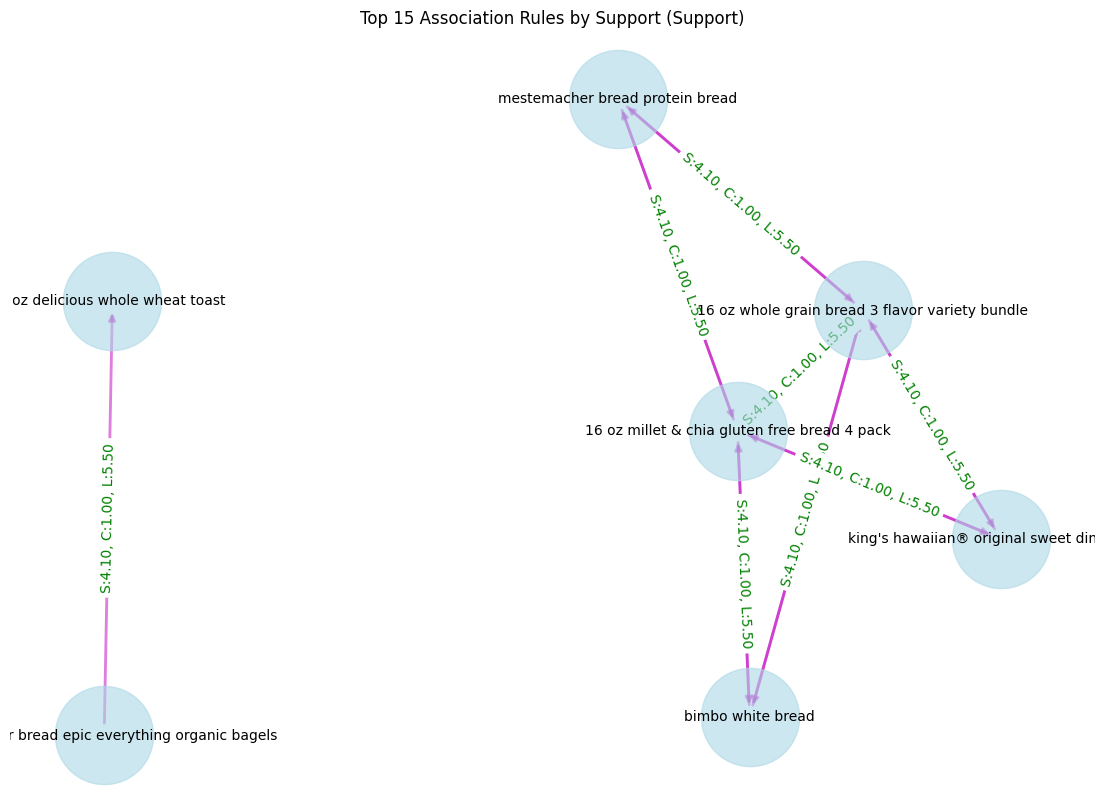

Graph Nodes: ['16 oz whole grain bread 3 flavor variety bundle', '16 oz millet & chia gluten free bread 4 pack', 'bimbo white bread', "king's hawaiian® original sweet dinner rolls", 'mestemacher bread protein bread', "dave's killer bread epic everything organic bagels", '5 oz delicious whole wheat toast']
Graph Edges: [('16 oz whole grain bread 3 flavor variety bundle', '16 oz millet & chia gluten free bread 4 pack', {'weight': 1.0, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}), ('16 oz whole grain bread 3 flavor variety bundle', 'bimbo white bread', {'weight': 1.0, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}), ('16 oz whole grain bread 3 flavor variety bundle', "king's hawaiian® original sweet dinner rolls", {'weight': 1.0, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}), ('16 oz whole grain bread 3 flavor variety bundle', 'mestemacher bread protein bread', {'weight': 1.0, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}),

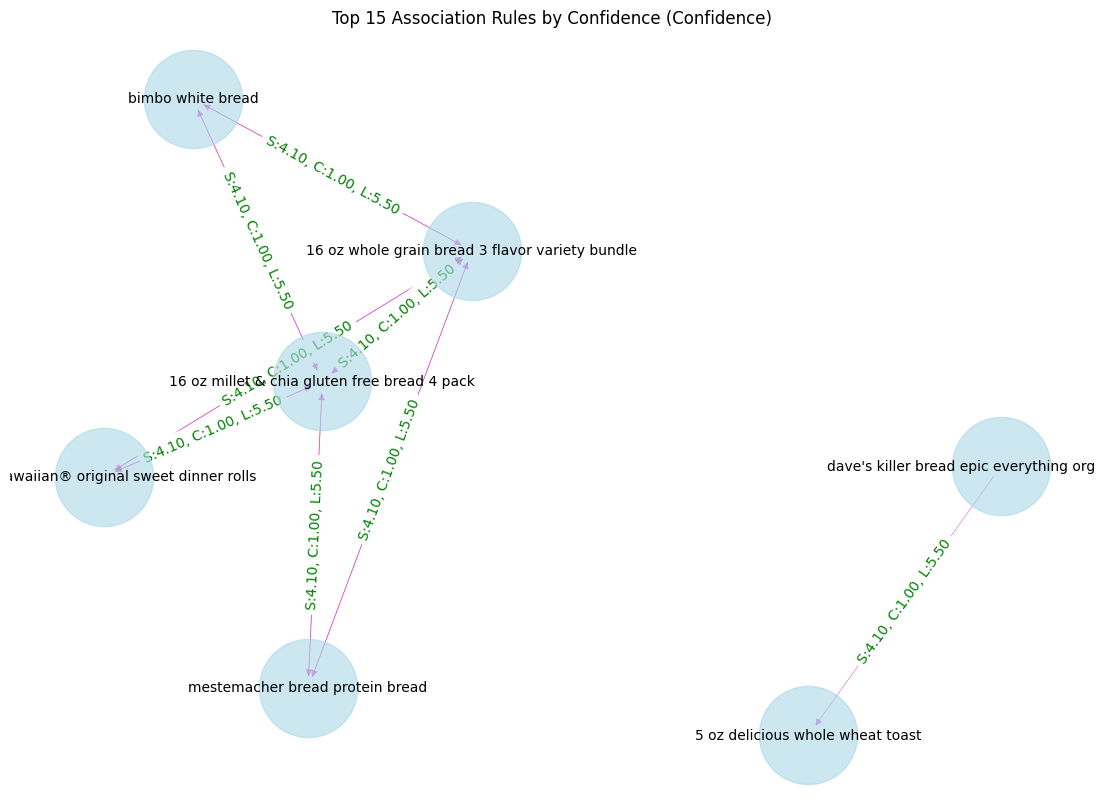

Graph Nodes: ['16 oz whole grain bread 3 flavor variety bundle', '16 oz millet & chia gluten free bread 4 pack', 'bimbo white bread', "king's hawaiian® original sweet dinner rolls", 'mestemacher bread protein bread', "dave's killer bread epic everything organic bagels", '5 oz delicious whole wheat toast']
Graph Edges: [('16 oz whole grain bread 3 flavor variety bundle', '16 oz millet & chia gluten free bread 4 pack', {'weight': 5.501258210544727, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}), ('16 oz whole grain bread 3 flavor variety bundle', 'bimbo white bread', {'weight': 5.501258210544727, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}), ('16 oz whole grain bread 3 flavor variety bundle', "king's hawaiian® original sweet dinner rolls", {'weight': 5.501258210544727, 'support': 4.1, 'confidence': 1.0, 'lift': 5.501258210544727}), ('16 oz whole grain bread 3 flavor variety bundle', 'mestemacher bread protein bread', {'weight': 5.501258210544727, 'suppor

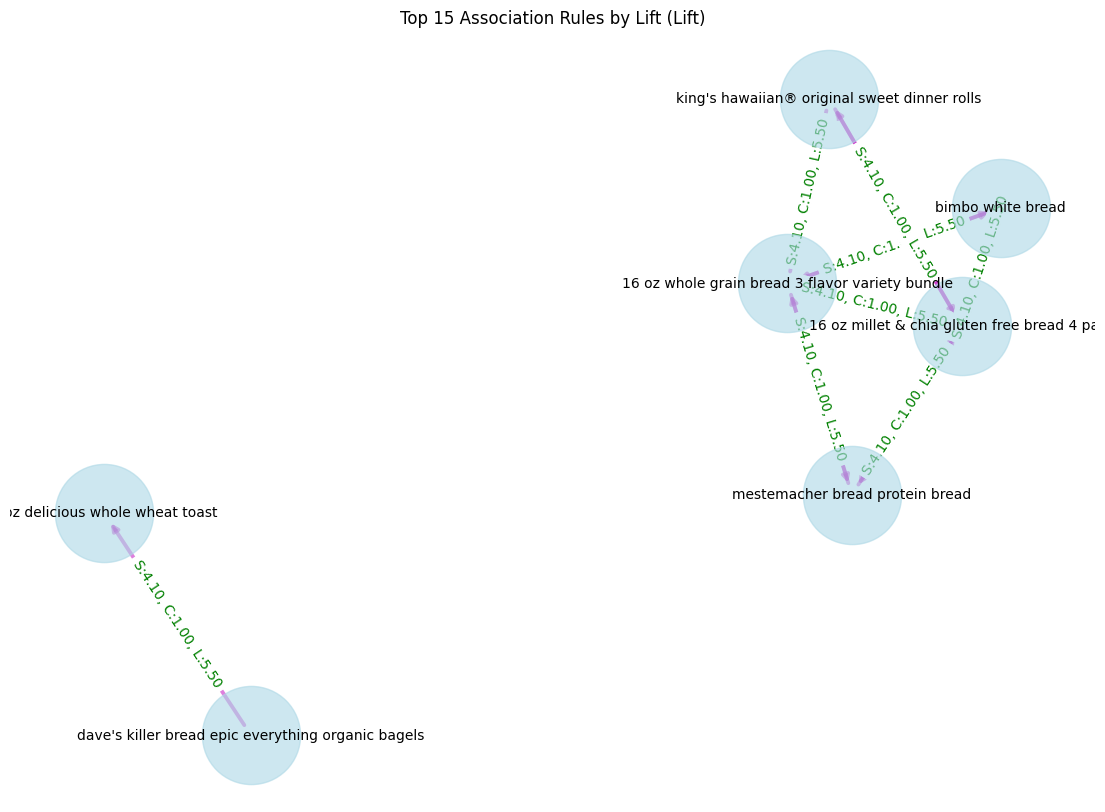

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_network_graph(rules, metric='lift', top_n=15, title_suffix=''):
    # Select the top N rules based on the given metric
    selected_rules = rules.nlargest(top_n, metric)

    # If no rules are available after filtering
    if selected_rules.empty:
        print("No rules available for visualization.")
        return

    # Create a directed graph
    plt.figure(figsize=(14, 10))
    G = nx.DiGraph()

    # Add edges with attributes
    for _, row in selected_rules.iterrows():
        antecedents = ', '.join(map(str, row['antecedents']))  
        consequents = ', '.join(map(str, row['consequents']))  
        G.add_edge(antecedents, consequents,
                   weight=row[metric],
                   support=row['support'],
                   confidence=row['confidence'],
                   lift=row['lift'])

    # Debugging Output
    print(f"Graph Nodes: {G.nodes()}")
    print(f"Graph Edges: {G.edges(data=True)}")

    if len(G.edges()) == 0:
        print("No edges found in the graph.")
        return

    # Graph layout
    pos = nx.spring_layout(G, k=1, iterations=20)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=5000, alpha=0.6)
    edge_widths = [G[u][v]['weight'] * 0.5 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='m')
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Draw edge labels
    edge_labels = { (u, v): f"S:{d['support']:.2f}, C:{d['confidence']:.2f}, L:{d['lift']:.2f}"
                    for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')

    # Title
    plt.title(f"Top {top_n} Association Rules by {metric.capitalize()} {title_suffix}")
    plt.axis('off')
    plt.show()

# Generate visualizations
draw_network_graph(rules_filtered, metric='support', top_n=15, title_suffix='(Support)')
draw_network_graph(rules_filtered, metric='confidence', top_n=15, title_suffix='(Confidence)')
draw_network_graph(rules_filtered, metric='lift', top_n=15, title_suffix='(Lift)')


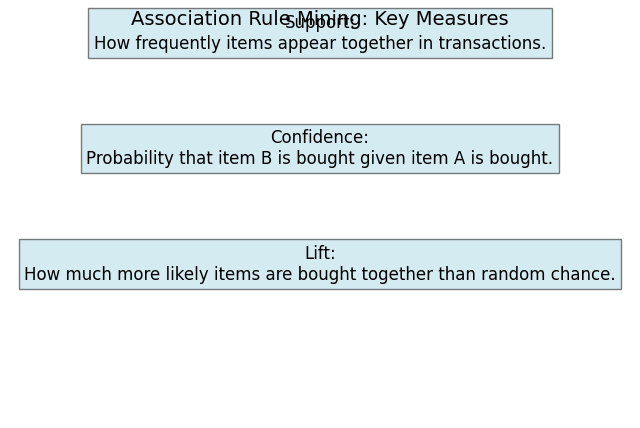

In [12]:

concepts = ["Support", "Confidence", "Lift"]
definitions = [
    "How frequently items appear together in transactions.",
    "Probability that item B is bought given item A is bought.",
    "How much more likely items are bought together than random chance."
]

# Plot the diagram
plt.figure(figsize=(8, 5))
for i, (concept, definition) in enumerate(zip(concepts, definitions)):
    plt.text(0.5, 1 - (i * 0.3), f"{concept}:\n{definition}", fontsize=12,
             ha='center', va='center', bbox=dict(facecolor='lightblue', alpha=0.5))

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title("Association Rule Mining: Key Measures", fontsize=14)
plt.show()


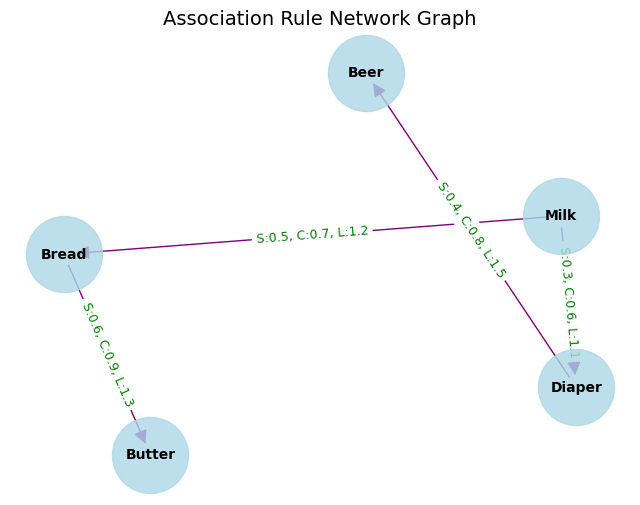

In [13]:

rules = [
    ("Milk", "Bread", 0.5, 0.7, 1.2),
    ("Diaper", "Beer", 0.4, 0.8, 1.5),
    ("Bread", "Butter", 0.6, 0.9, 1.3),
    ("Milk", "Diaper", 0.3, 0.6, 1.1),
]

# Create graph
G = nx.DiGraph()

# Add edges with attributes (support, confidence, lift)
for antecedent, consequent, support, confidence, lift in rules:
    G.add_edge(antecedent, consequent, weight=support, confidence=confidence, lift=lift)

# Layout and visualization
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, k=1.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color="purple", arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Edge labels
edge_labels = {(u, v): f"S:{G[u][v]['weight']}, C:{G[u][v]['confidence']}, L:{G[u][v]['lift']}"
               for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_color="green")

plt.title("Association Rule Network Graph", fontsize=14)
plt.axis('off')
plt.show()
